Построим систему, которая устраняет шум в изображениях. На входе она будет получать зашумленное изображение цифры и выдавать чистое изображение цифры.

In [1]:
# скачаю датасет с картинками рукописных цифр
import numpy as np
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
# Добавим шум
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise

noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [4]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

0


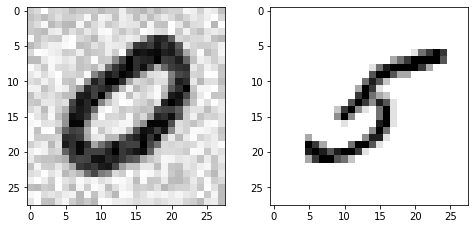

1


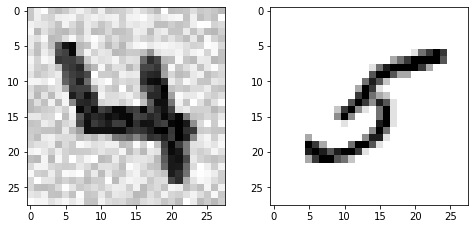

2


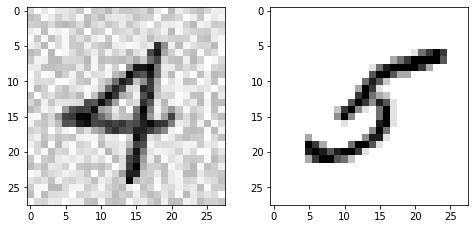

3


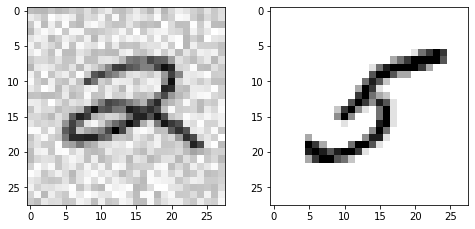

4


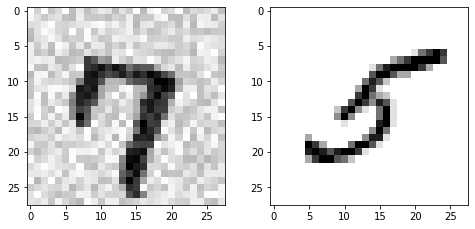

5


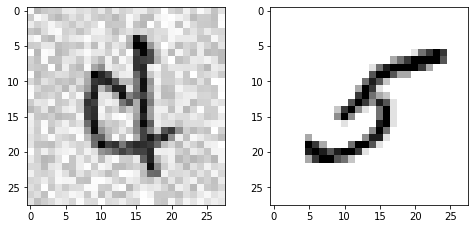

6


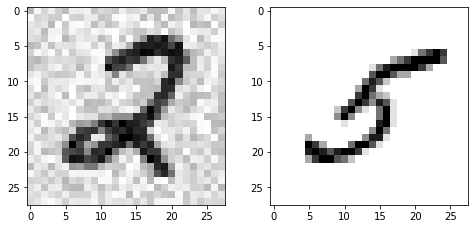

7


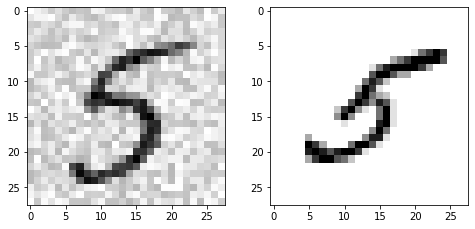

8


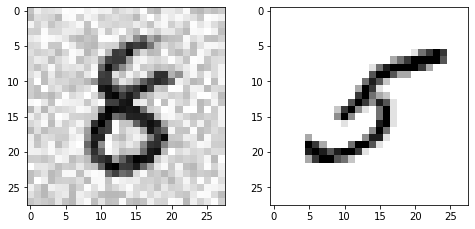

9


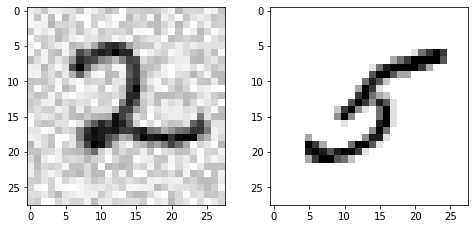

10


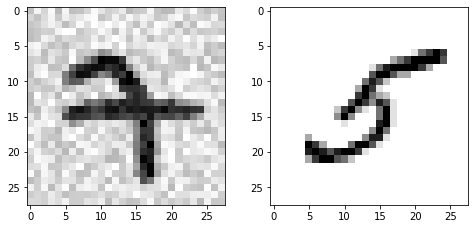

11


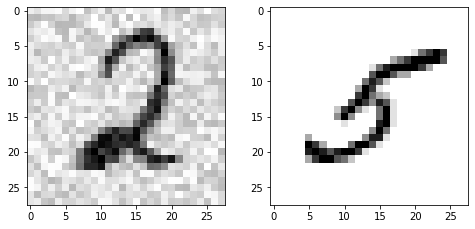

12


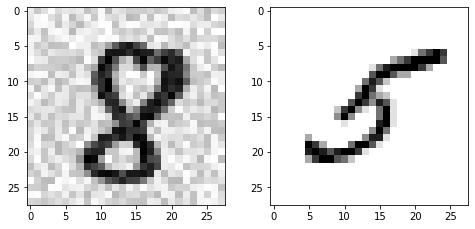

13


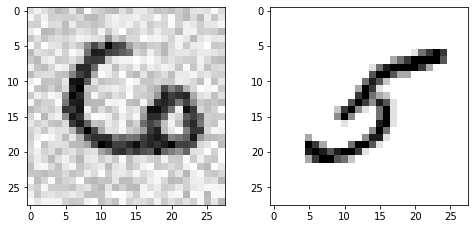

14


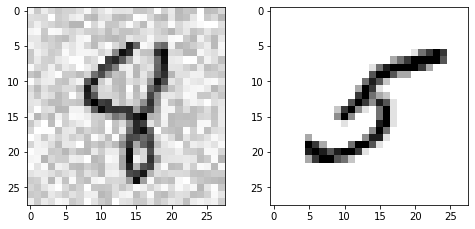

15


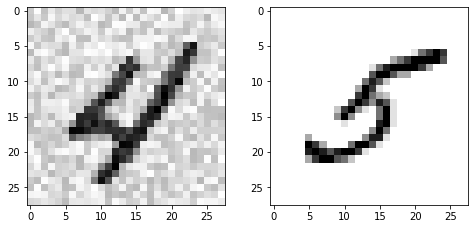

16


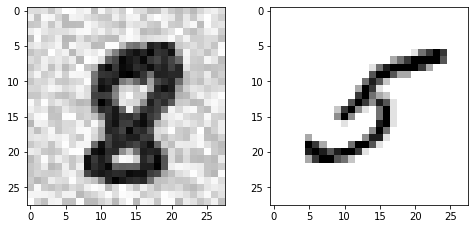

17


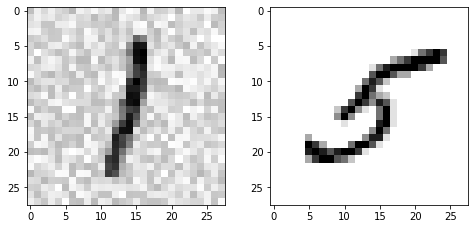

18


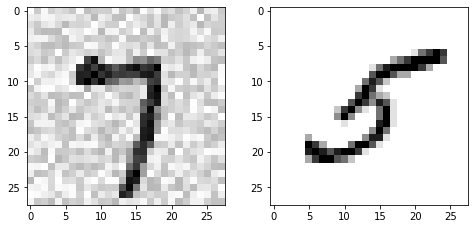

19


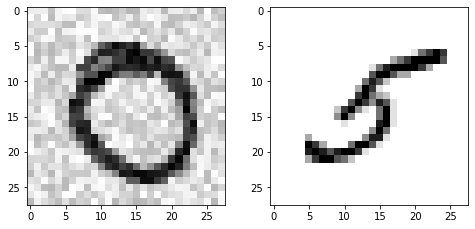

20


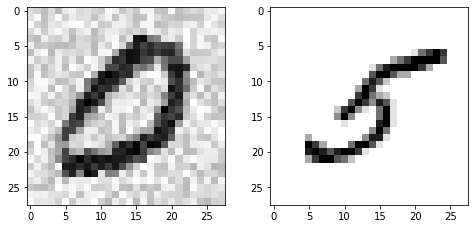

21


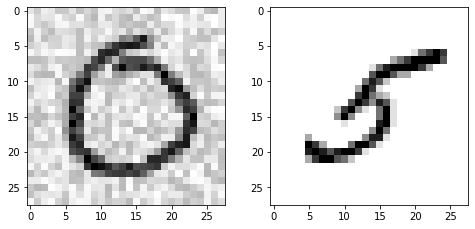

22


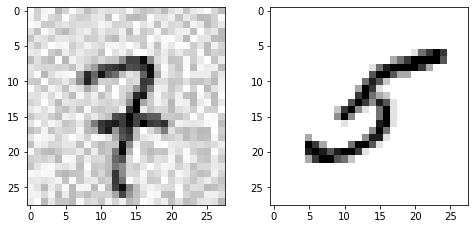

23


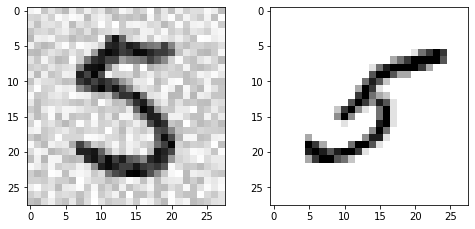

24


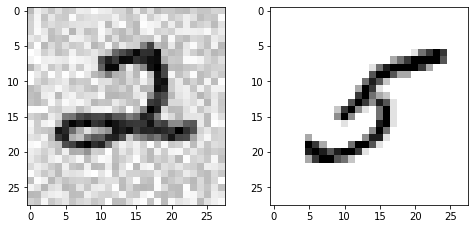

25


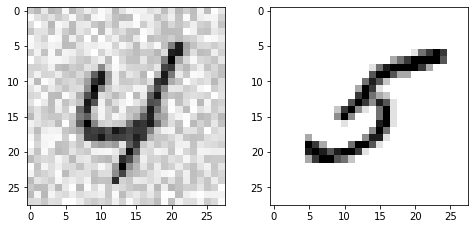

26


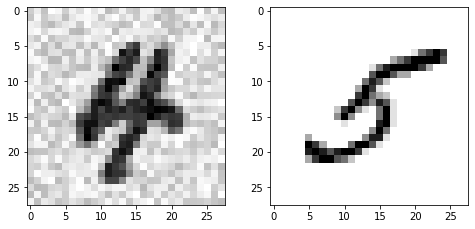

27


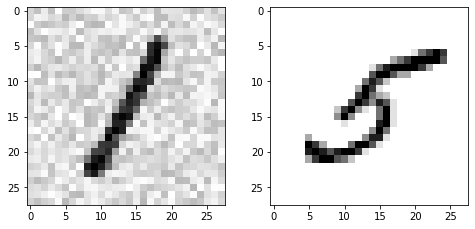

28


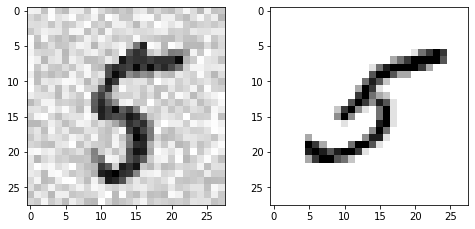

29


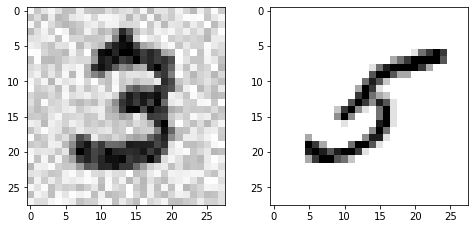

30


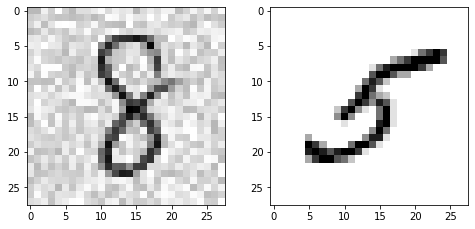

31


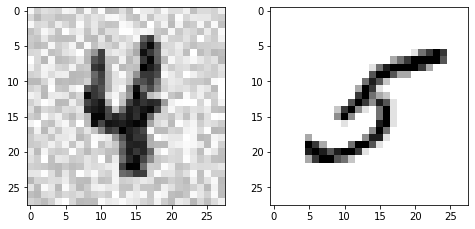

32


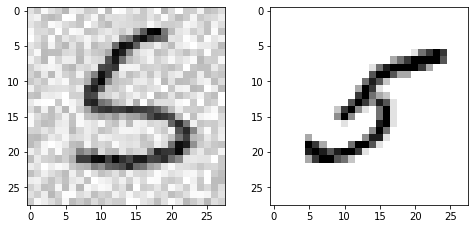

33


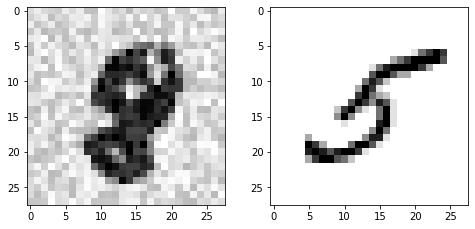

34


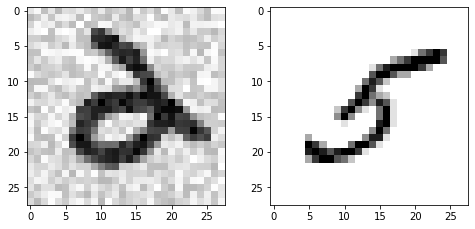

35


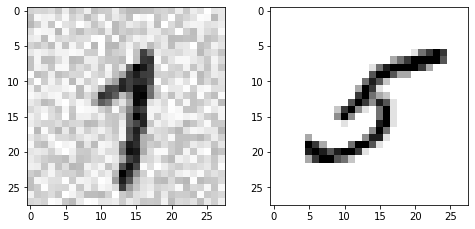

36


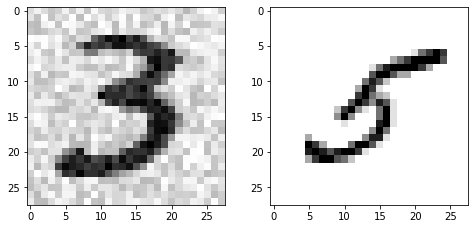

37


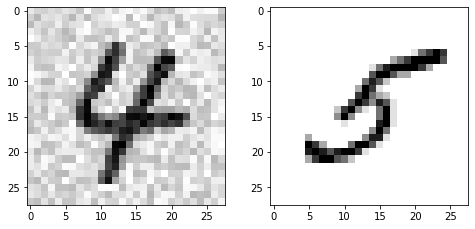

38


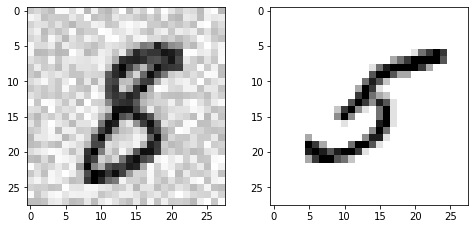

39


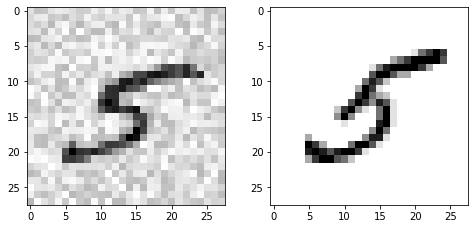

40


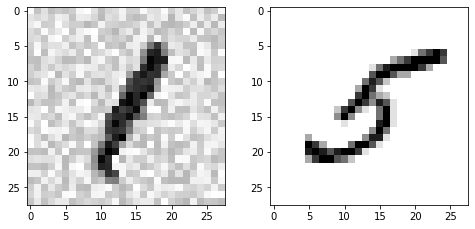

41


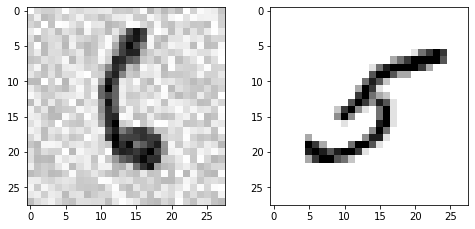

42


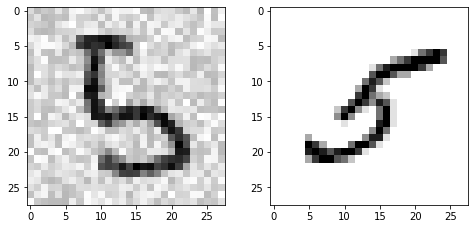

43


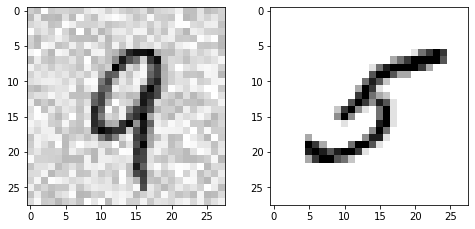

44


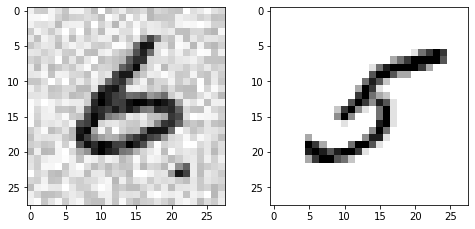

45


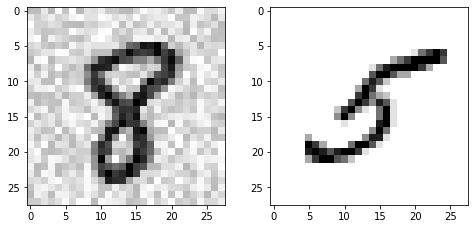

46


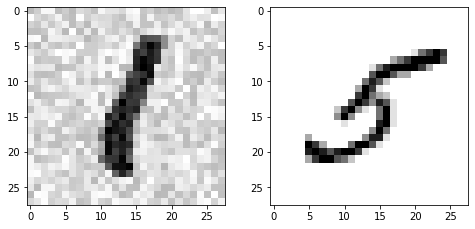

47


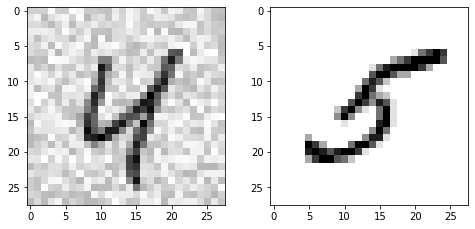

48


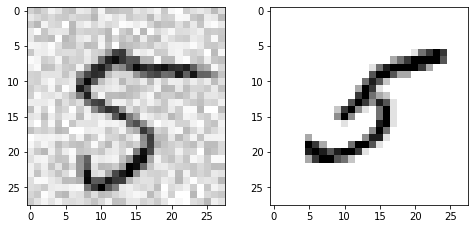

49


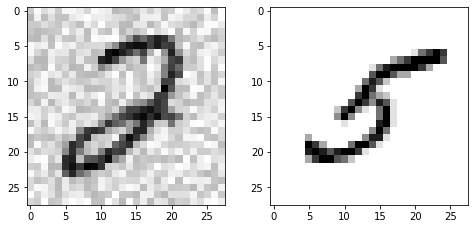

50


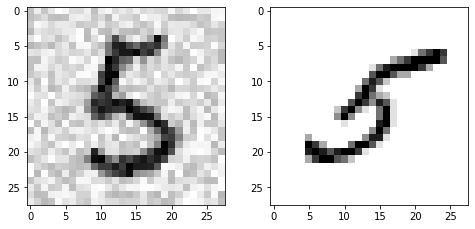

51


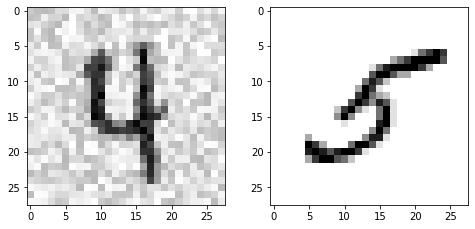

52


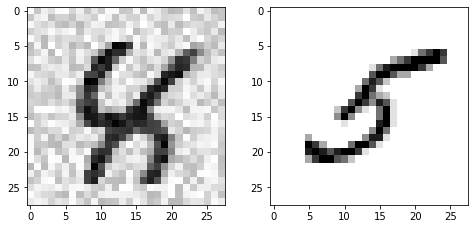

53


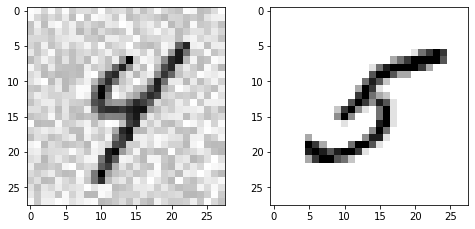

54


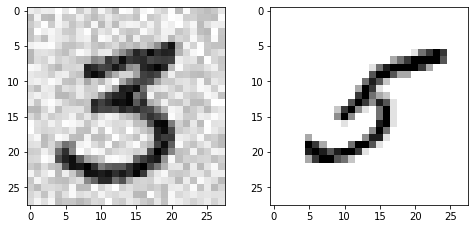

55


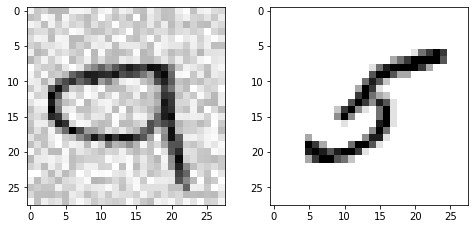

56


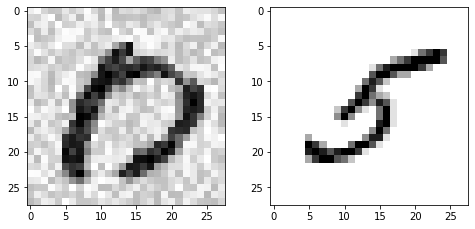

57


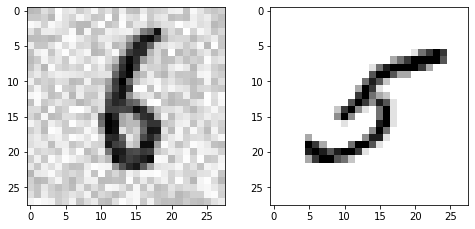

58


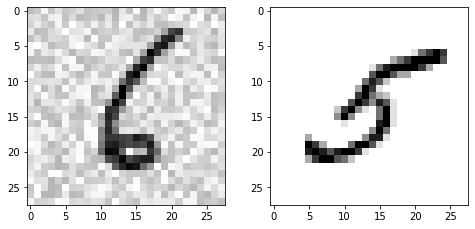

59


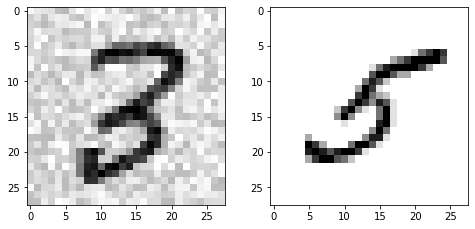

60


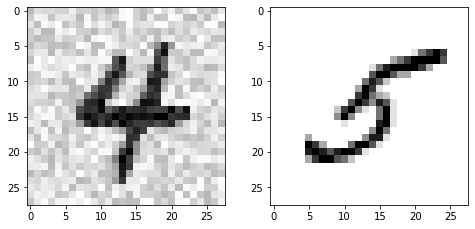

61


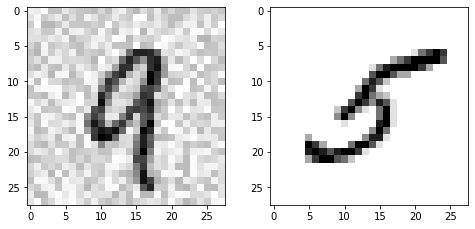

62


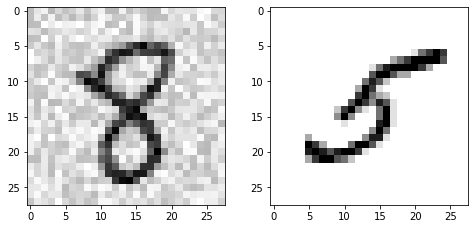

63


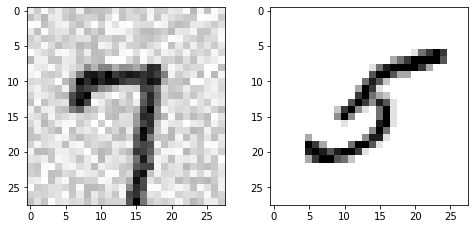

64


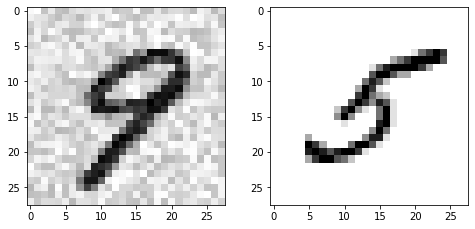

65


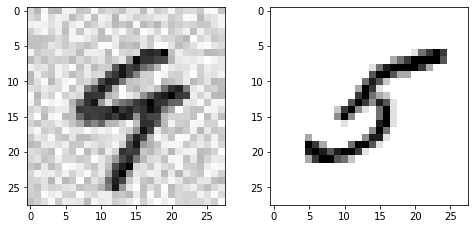

66


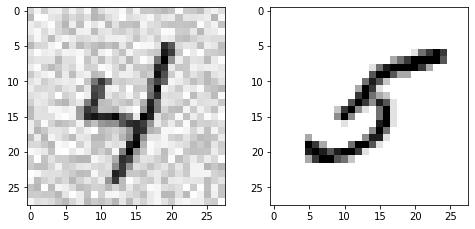

67


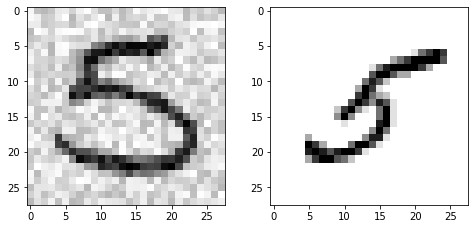

68


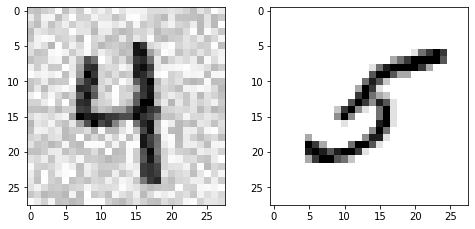

69


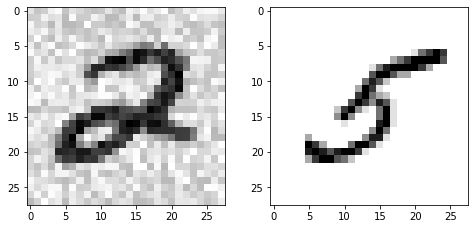

70


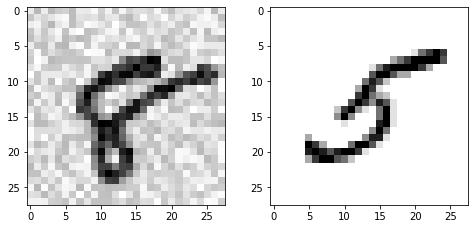

71


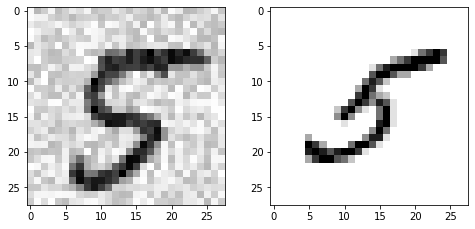

72


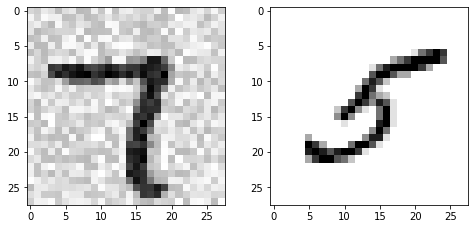

73


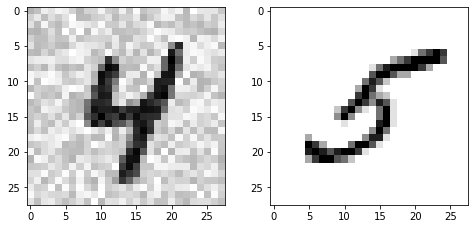

74


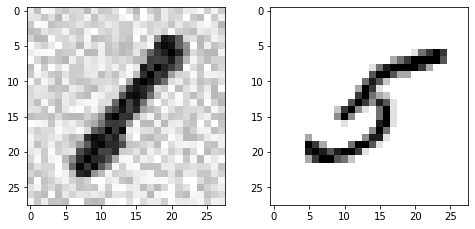

75


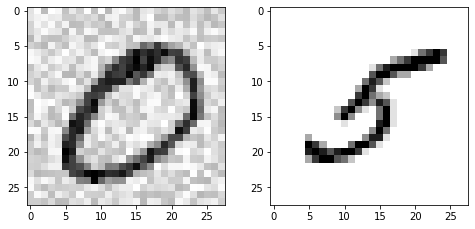

76


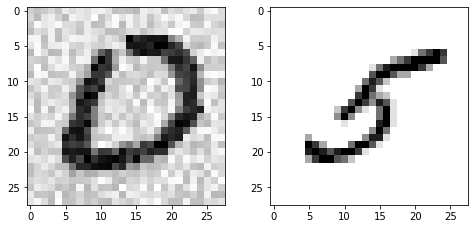

77


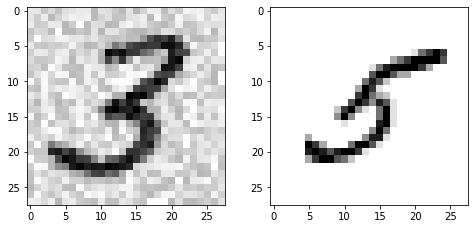

78


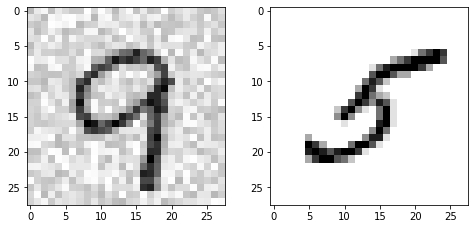

79


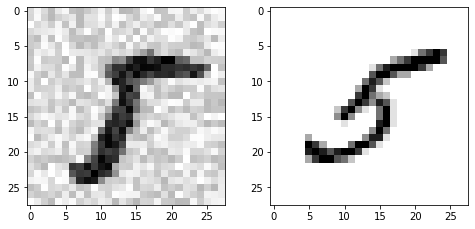

80


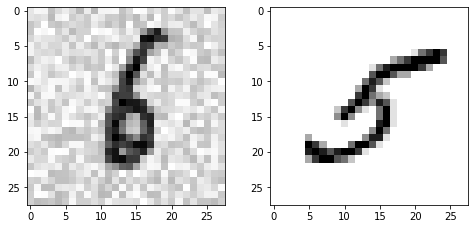

81


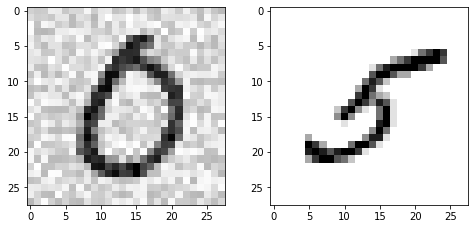

82


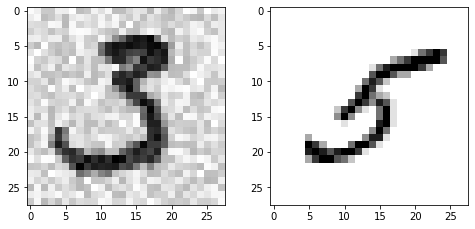

83


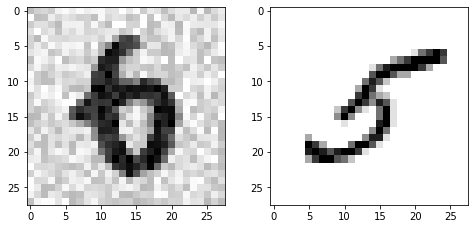

84


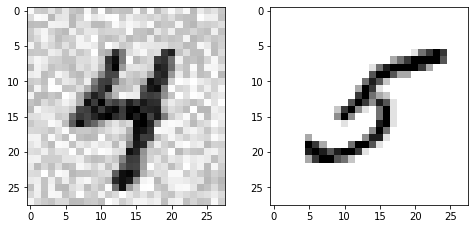

85


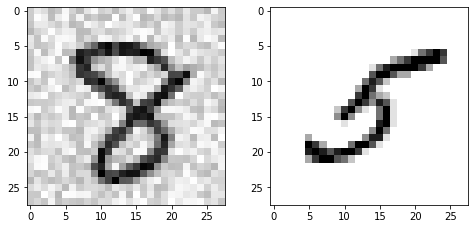

86


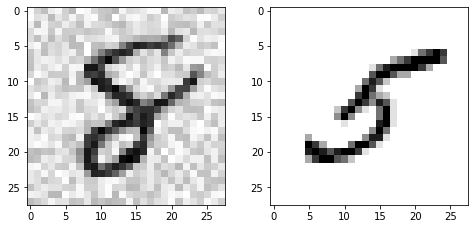

87


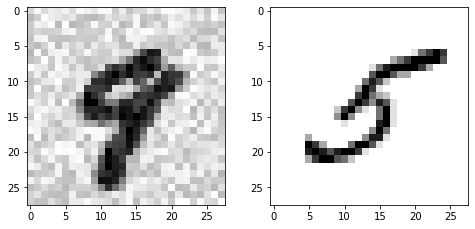

88


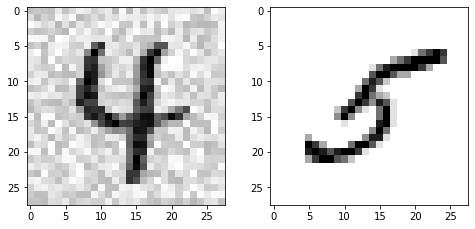

89


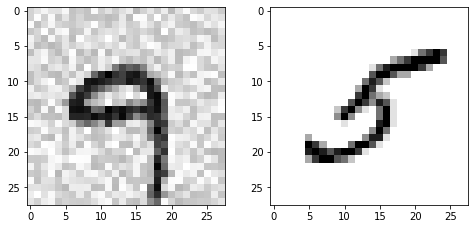

90


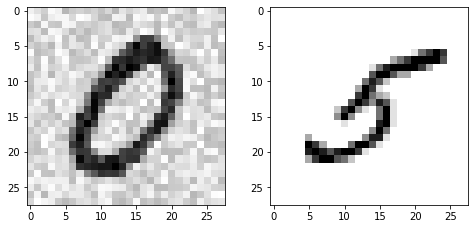

91


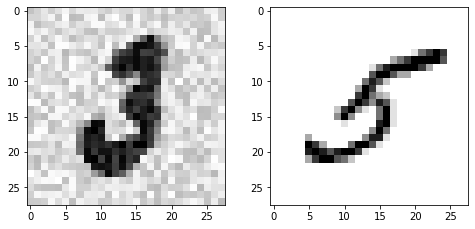

92


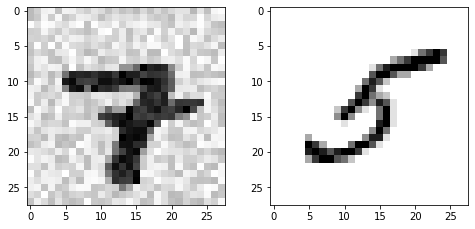

93


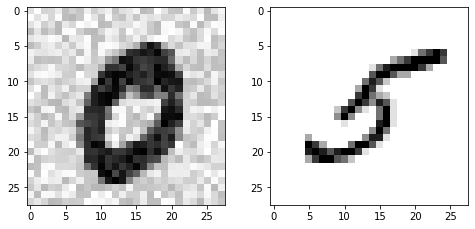

94


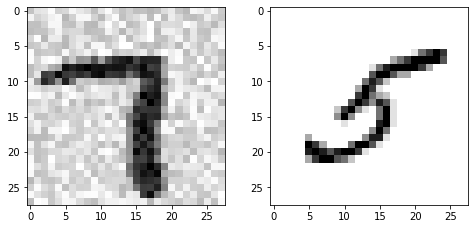

95


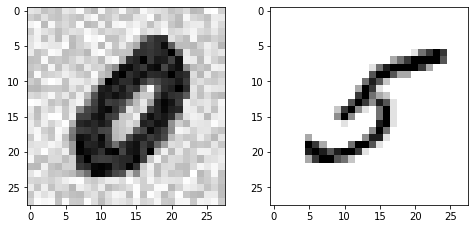

96


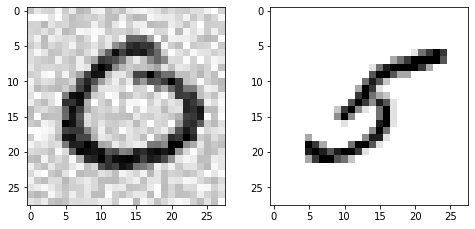

97


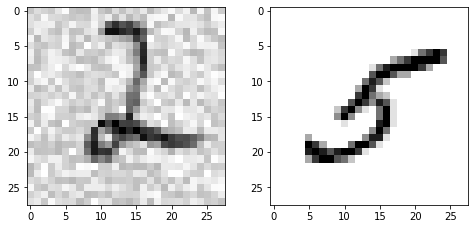

98


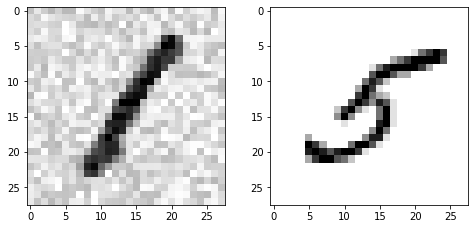

99


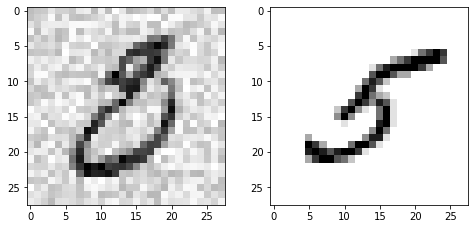

In [86]:
# визуализирую 
for i in range(100):
    print(i)
    some_digit = X_train_mod[i]
    some_digit_image = some_digit.reshape(28, 28)

    plt.figure(figsize=(8, 8))

    plt.subplot(221)
    plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")

    plt.subplot(222)
    plt.imshow(X[35].reshape(28, 28), cmap=matplotlib.cm.binary, interpolation="nearest")

    plt.show()

Слево показано зашумленное изображение , а справа чистое.
Обучим классификатор и очистим зашумленные изображения

In [79]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

In [90]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier().fit(X_train_mod, y_train_mod)
clear_digit = knn_clf.predict([X_test_mod[35]])

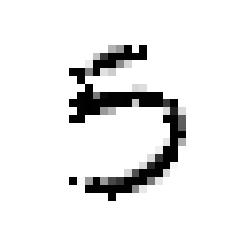

In [89]:
plot_digits(clear_digit)

Согласитесь выглядит достаточно близко к цели!